# Your Details

Your Name: Dylan Rodrigues

Your ID Number: 24121479

# Etivity 2 - Task 1: Hyperparamter Tuning - Improving your Deep Neural Network!

You will need to have completed Task 2 of Etivity 1! in order to do this assignment.

The aim of this task is to improve your dog vs. cat DNN model for which you'll use the functions from the previous assignment to optimise a deep layer neural network using hyperparameter tuning. There are 3 main exercise parts to this task.

1. Apply weight parameter initialisations to the learning process.
2. Use L2 regularization in your deep learning model.
3. Apply dropout regularization.

Training your neural network requires specifying an initial value of the weights. A well-chosen initialisation method helps the learning process. In this notebook, you'll try out a few different initialisations, including random, zeros, and He initialisation, and see how each leads to different results.

Deep Learning models have so much flexibility and capacity that **overfitting can be a serious problem**, if the training dataset is not big enough, it does well on the training set, but the learned network **doesn't generalise to new examples** that it has never seen!

**For this assignment you will be need to complete the following exercises:**

- Section 3: [Exercise 1-1](#ex-1), [Exercise 1-2](#ex-2), [Exercise 1-3](#ex-3): Analyze various initialisation methods to speed up the convergence of gradient descent and to increase the odds of gradient descent converging to a lower training. (and generalisation) error 
- Section 4: [Exercise 2-1](#ex-4), [Exercise 2-2](#ex-5): Implement L2 regularization in your model to help overcome overfitting.
- Section 5: [Exercise 3-1](#ex-6), [Exercise 3-2](#ex-7): Evaluate Droprout regularization in your model.


## Important Note on Submission 

There are 3 main exercises to complete in this task. Use notes provided to help you build understanding. Insert your code entries for each of these exercises. Please make sure to enter your code after this line so that grading can easily be assessed.

**\# ENTER CODE HERE**


Please make sure you are not doing the following:

1. You have not added any _extra_ `print` statement(s) in the assignment.
2. You have not added any _extra_ code cell(s) in the assignment.
3. You have not changed any of the function parameters.
4. You are not using any global variables inside your graded exercises. Unless specifically instructed to do so, please refrain from it and use the local variables instead.
5. You are not changing the assignment code where it is not required, like creating _extra_ variables.

## Table of Contents
- [1 - Packages](#1)
- [2 - Load and Process the Dataset](#2)
- [3 - L layer Model Neural Network- Parameter Initialisation](#3)
    - [3.1 - Random Initialisation](#3-1)
        - [Exercise 1.1 - initialise_parameters_random](#ex-1)
    - [3.2 - Xavier Initialisation](#3-2)
        - [Exercise 1.2 - initialise_parameters_xavier](#ex-2)
    - [3.3 - He Initialisation](#3-3)
        - [Exercise 1.3 - initialise_parameters_he](#ex-3)
- [4 - L-layer Neural Network with L2 regularization](#4)
    - [4.1 - Regularized Model](#4-1)
    - [4.2 - L2 Regularization](#4-2)
        - [Exercise 2.1 - compute_cost_with_regularization](#ex-4)
        - [Exercise 2.2 - linear_backward_with_regularization](#ex-5)        
- [5 - L-layer Neural Network with Dropout](#5)
    - [5.1 - Dropout Model](#5-1)
    - [5.2 - Forward Propagation with Dropout](#5-1)
        - [Exercise 3.1 - drop_out_matrices and L_model_forward_with_dropout](#ex-6)
    - [5.3 - Backward Propagation with Dropout](#5-1)
        - [Exercise 3.2 - L_model_backward_with_dropout](#ex-7)
- [6 - Results Analysis](#6)
- [7 - Test with your own image (optional/ungraded exercise)](#7)

<a name='1'></a>
## 1 - Packages

Begin by importing all the packages you'll need during this assignment. 

- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.
- [pandas](https://pandas.pydata.org/) is a powerful, flexible and easy to use open source data analysis and manipulation tool that also allos us to plot data visually.
- [os](https://docs.python.org/3/library/os.html)  This package provides a portable way of using operating system dependent functionality.
- `dnn_fucntions` provides the encrypted functions implemented in the "Improving your Deep Neural Network: Step by Step" assignment to this notebook. You will need to  copy the "dist" folder into your directory structure.
- `np.random.seed(1)` is used to keep all the random function calls consistent. It helps grade your work - so please don't change it! 

In [2]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import os

from PIL import Image
from scipy import ndimage
os.chdir ("dist")
from dnn_functions import *
os.chdir ("..")

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a name='2'></a>
## 2 - Load and Process the Dataset

You'll load the exam same datset that you used in Activity 1 - Part 2 for the Cat vs. Dog classification exercise. Recall that we only have 1250 images in total. For this exercise, we will assign 75% of the images for the training set and 25% of the images for the test set.

In [3]:
 X_train, Y_train, X_test, Y_test, classes = load_dataset()

The following code will show you an image in the dataset. Feel free to change the index and re-run the cell multiple times to check out other images.

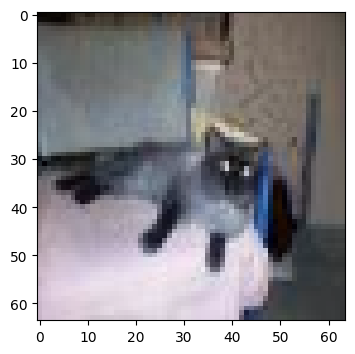

y = 0. It's a cat picture.


In [4]:
# Example of a picture
index = 3
#classes = ['cat', 'dog']
plt.imshow(X_train[index])
plt.show()
print ("y = " + str(Y_train[0,index]) + ". It's a " + classes[Y_train[0,index]]  +  " picture.")

In [5]:
# Explore your dataset 
m_train = X_train.shape[0]
num_px = X_train.shape[1]
m_test = X_test.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("Train_x shape: " + str(X_train.shape))
print ("Train_y shape: " + str(Y_train.shape))
print ("Test_x shape: " + str(X_test.shape))
print ("Test_y shape: " + str(Y_test.shape))

Number of training examples: 937
Number of testing examples: 313
Each image is of size: (64, 64, 3)
Train_x shape: (937, 64, 64, 3)
Train_y shape: (1, 937)
Test_x shape: (313, 64, 64, 3)
Test_y shape: (1, 313)


As usual, you reshape and standardise the images before feeding them to the network. The code is given in the cell below.

<img src="images/imvector_dog_reshaped.png" style="width:450px;height:300px;">
<caption><center><font color='purple'><b>Figure 1</b>: Image to vector conversion.</font></center></caption>

In [6]:
# Reshape the training and test examples 
train_x_flatten = X_train.reshape(X_train.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = X_test.reshape(X_test.shape[0], -1).T

# Standardise data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

train_y = Y_train;
test_y = Y_test;
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 937)
test_x's shape: (12288, 313)


**Note**:
$12,288$ equals $64 \times 64 \times 3$, which is the size of one reshaped image vector.

<a name='3'></a>
## 3 - L-Layer Neural Network - Parameter Initialisation

###  Test the L_layer_model with different parameter initialisations

You'll use a L-layer neural network (already implemented for you). These are the initialisation methods you'll experiment with: 
- *Random initialisation* -- setting `initialisation = "random"` in the input argument. This initialises the weights to  random values.  
- *Xavier initialisation* --  setting `initialisation = "xavier"` in the input argument. This initialises the weights to random values scaled according to a paper by Xavier (Glorot), 2010.
- *He initialisation* -- setting `initialisation = "he"` in the input argument. This initialises the weights to random values scaled according to a paper by He et al., 2015. 

**Instructions**: Instructions: Read over the code below, and run it. In the next part, you'll implement the three initialisation methods that this `model()` calls.

In [7]:
# L_layer_model

def L_layer_model(X, Y, layer_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False, initialisation = "xavier"):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if dog), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimisation loop
    print_cost -- if True, it prints the cost every 100 steps
    initialisation -- flag to choose which initialisation to use ("random","xavier" or "he")
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Initialise parameters dictionary.
    if initialisation == "random":
        parameters = initialise_parameters_random(layer_dims)
    elif initialisation == "xavier":
        parameters = initialise_parameters_xavier(layer_dims)
    elif initialisation == "he":
        parameters = initialise_parameters_he(layer_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)        
         
        # Compute cost.
        cost = compute_cost(AL, Y)
   
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                  
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
   
    return parameters, costs

def plot_costs(costs, learning_rate = 0.0075):
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.plot(costs)   
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundereds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    

<a name='3-1'></a>
## 3.1 - Random Initialisation

There are two types of parameters to initialise in a neural network:
- The weight matrices $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
- The bias vectors $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$]

Initialise the weights randomly so that each neuron can then proceed to learn a different function of its inputs. In this exercise, you'll see what happens when the weights are initialised randomly to large values.

<a name='ex-1'></a>
### Exercise 1.1 - initialise_parameters_random

Implement the following function to initialise your weights to relatively large random values (scaled by \*0.20) and your biases to zeros. Use `np.random.randn(..,..) * 0.2` for weights and `np.zeros((.., ..))` for biases. You're using a fixed `np.random.seed(..)` to make sure your "random" weights match the teaching assistants, so don't worry if running your code several times always gives you the same initial values for the parameters.

In [9]:
# GRADED FUNCTION: initialise_parameters_random

def initialise_parameters_random(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):       
        # ENTER CODE HERE (~ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.2
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        
    return parameters

In [10]:
# Test initialise_parameters_random function
layer_dims_test = [5, 4, 3]  # Example: 3-layer network with input 5, hidden 4, output 3
parameters_test = initialise_parameters_random(layer_dims_test)

# Print shapes to verify correctness
for l in range(1, len(layer_dims_test)):
    print(f"W{l} shape: {parameters_test['W' + str(l)].shape}")
    print(f"b{l} shape: {parameters_test['b' + str(l)].shape}")

W1 shape: (4, 5)
b1 shape: (4, 1)
W2 shape: (3, 4)
b2 shape: (3, 1)


In [11]:
parameters_test

{'W1': array([[ 0.32486907, -0.12235128, -0.10563435, -0.21459372,  0.17308153],
        [-0.46030774,  0.34896235, -0.15224138,  0.06380782, -0.04987408],
        [ 0.29242159, -0.41202814, -0.06448344, -0.07681087,  0.22675389],
        [-0.21997825, -0.03448564, -0.17557168,  0.00844275,  0.11656304]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[-0.22012384,  0.22894474,  0.18031814,  0.10049887],
        [ 0.18017119, -0.13674557, -0.02457805, -0.18715389],
        [-0.05357762,  0.10607109, -0.13833215, -0.07935071]]),
 'b2': array([[0.],
        [0.],
        [0.]])}

#### Set up your layer dimensions  for this exercise
Run the cell below to set up as a 4-layer neural network.

In [12]:
### CONSTANTS ###
layer_dims = [12288, 20, 7, 5, 1] #  4-layer model with 3 hidden layers and 1 output layer

**Train using random initialisation**
- Train your model as a 4 layer neural network
- The cost should decrease on every iteration. 
- It may take up to 5 minutes to run 2500 iterations.

Cost after iteration 0: 1.137460339072303
Cost after iteration 100: 0.6939063069528494
Cost after iteration 200: 0.6924502379676744
Cost after iteration 300: 0.6918701621632664
Cost after iteration 400: 0.69142754104659
Cost after iteration 500: 0.6910465060449404
Cost after iteration 600: 0.6907039383044872
Cost after iteration 700: 0.6903721345902339
Cost after iteration 800: 0.6900499946067298
Cost after iteration 900: 0.6897148057465323
Cost after iteration 1000: 0.6893521282101245
Cost after iteration 1100: 0.6889766103582955
Cost after iteration 1200: 0.6885973109925749
Cost after iteration 1300: 0.6882050832921704
Cost after iteration 1400: 0.6877945805978665
Cost after iteration 1500: 0.6873381646552847
Cost after iteration 1600: 0.6868605406238041
Cost after iteration 1700: 0.6863170281417964
Cost after iteration 1800: 0.6857529660357732
Cost after iteration 1900: 0.6851674185722058
Cost after iteration 2000: 0.6845022227275501
Cost after iteration 2100: 0.6837312449630494
Cos

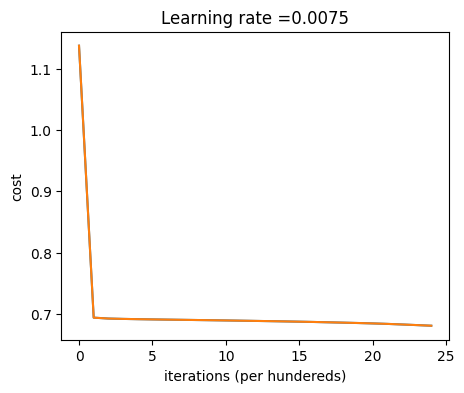

On the training set:
Accuracy: 0.5795090715048026
On the test set:
Accuracy: 0.47603833865814693


In [13]:
parameters, costs = L_layer_model(train_x, train_y, layer_dims, learning_rate = 0.0075, num_iterations = 2500, print_cost = True, initialisation = "random")
plot_costs(costs, learning_rate=0.0075)
print ("On the training set:")
pred_train = predict(train_x, train_y, parameters)
print ("On the test set:")
pred_test = predict(test_x, test_y, parameters)

<a name='3-2'></a>
## 3.2 - Xavier Initialisation

Lets' try "Xavier Initialisation"; this is named for the first author of Xavier (Glorot), 2010. Xavier initialisation uses a scaling factor for the weights $W^{[l]}$ of `sqrt(1./layers_dims[l-1])`.

<a name='ex-2'></a>
### Exercise 1.2 - initialise_parameters_xavier

Implement the following function to initialise your parameters with Xavier initialisation. This function is similar to the previous `initialise_parameters_random(...)`. The only difference is that instead of multiplying `np.random.randn(..,..)` by 0.20, you will multiply it by $\sqrt{\frac{1}{\text{dimension of the previous layer}}}$. Xavier initialisation is recommended for layers with a sigmoid or tanh activation, but seems to work well in this DNN example.

In [14]:
# GRADED FUNCTION: initialise_parameters_xavier

def initialise_parameters_xavier(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        # ENTER CODE HERE (~ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(1. / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        
    return parameters

In [15]:
# Test initialise_parameters_xavier function
layer_dims_test = [5, 4, 3]  # Example: 3-layer network with input 5, hidden 4, output 3
parameters_test = initialise_parameters_xavier(layer_dims_test)

# Print shapes to verify correctness
for l in range(1, len(layer_dims_test)):
    print(f"W{l} shape: {parameters_test['W' + str(l)].shape}")
    print(f"b{l} shape: {parameters_test['b' + str(l)].shape}")

W1 shape: (4, 5)
b1 shape: (4, 1)
W2 shape: (3, 4)
b2 shape: (3, 1)


In [16]:
parameters_test

{'W1': array([[ 0.79989897,  0.19521314,  0.04315498, -0.83337927, -0.12405178],
        [-0.15865304, -0.03700312, -0.28040323, -0.01959608, -0.21341839],
        [-0.58757818,  0.39561516,  0.39413741,  0.76454432,  0.02237573],
        [-0.18097724, -0.24389238, -0.69160568,  0.43932807, -0.49241241]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[-0.59252326, -0.10282495,  0.74307418,  0.11835813],
        [-0.51189257, -0.3564966 ,  0.31262248, -0.08025668],
        [-0.38441818, -0.11501536,  0.37252813,  0.98805539]]),
 'b2': array([[0.],
        [0.],
        [0.]])}

**Train using xavier initialisation**

Cost after iteration 0: 0.6966729673601983
Cost after iteration 100: 0.6883602919039347
Cost after iteration 200: 0.6826438272299052
Cost after iteration 300: 0.6759850643618345
Cost after iteration 400: 0.6679028148847601
Cost after iteration 500: 0.6580826952827367
Cost after iteration 600: 0.6468164479124551
Cost after iteration 700: 0.633147781593861
Cost after iteration 800: 0.6219593957485833
Cost after iteration 900: 0.6148156831883287
Cost after iteration 1000: 0.6073826071975356
Cost after iteration 1100: 0.597852754588654
Cost after iteration 1200: 0.5922561267957929
Cost after iteration 1300: 0.5736649176073998
Cost after iteration 1400: 0.5702426348059672
Cost after iteration 1500: 0.5555562974952003
Cost after iteration 1600: 0.5493860684486935
Cost after iteration 1700: 0.5308850692043663
Cost after iteration 1800: 0.5197683666674637
Cost after iteration 1900: 0.5081214501267579
Cost after iteration 2000: 0.5068609099142778
Cost after iteration 2100: 0.4729976416477741
Co

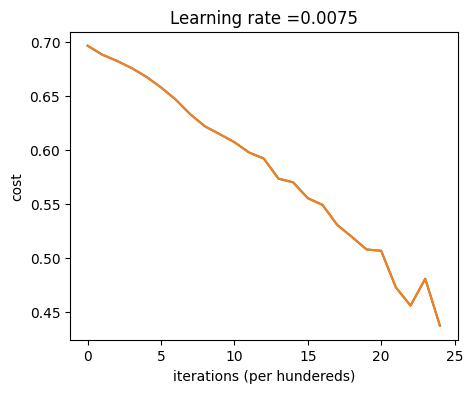

On the training set:
Accuracy: 0.8228388473852721
On the test set:
Accuracy: 0.5431309904153354


In [17]:
parameters, costs = L_layer_model(train_x, train_y, layer_dims, learning_rate = 0.0075, num_iterations = 2500, print_cost = True, initialisation = "xavier")
plot_costs(costs, learning_rate=0.0075)
print ("On the training set:")
pred_train = predict(train_x, train_y, parameters)
print ("On the test set:")
pred_test = predict(test_x, test_y, parameters)

<a name='3-3'></a>
## 3.3 - He Initialisation

Finally, lets' try "He Initialisation"; this is named for the first author of He et al., 2015. He initialisation uses `sqrt(2./layers_dims[l-1])`.)

<a name='ex-3'></a>
### Exercise 1.3 - initialise_parameters_he

Implement the following function to initialise your parameters with He initialization. This function is similar to the previous `initialise_parameters_random(...)`. The only difference is that instead of multiplying `np.random.randn(..,..)` by 0.20, you will multiply it by $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$, which is the initialisation recommended for layers with a ReLU activation. 

In [18]:
# GRADED FUNCTION: initialise_parameters_he

def initialise_parameters_he(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        # ENTER CODE HERE (~ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2. / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [19]:
# Test initialise_parameters_he function
layer_dims_test = [5, 4, 3]  # Example: 3-layer network with input 5, hidden 4, output 3
parameters_test = initialise_parameters_he(layer_dims_test)

# Print shapes to verify correctness
for l in range(1, len(layer_dims_test)):
    print(f"W{l} shape: {parameters_test['W' + str(l)].shape}")
    print(f"b{l} shape: {parameters_test['b' + str(l)].shape}")

W1 shape: (4, 5)
b1 shape: (4, 1)
W2 shape: (3, 4)
b2 shape: (3, 1)


In [20]:
parameters_test

{'W1': array([[ 1.13122797,  0.27607307,  0.06103036, -1.17857627, -0.1754357 ],
        [-0.22436928, -0.05233031, -0.39655005, -0.02771304, -0.30181918],
        [-0.83096103,  0.55948432,  0.55739447,  1.08122894,  0.03164405],
        [-0.25594047, -0.34491592, -0.97807813,  0.62130372, -0.69637631]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[-0.83795444, -0.14541644,  1.05086558,  0.16738368],
        [-0.72392541, -0.50416233,  0.44211496, -0.11350009],
        [-0.5436494 , -0.16265628,  0.52683434,  1.39732134]]),
 'b2': array([[0.],
        [0.],
        [0.]])}

**Train using He initialisation**

Cost after iteration 0: 0.7365130731870172
Cost after iteration 100: 0.6845719271428473
Cost after iteration 200: 0.6664167281197104
Cost after iteration 300: 0.6476282240233834
Cost after iteration 400: 0.6301740076034373
Cost after iteration 500: 0.6087115544402767
Cost after iteration 600: 0.6027131150694529
Cost after iteration 700: 0.5768594807605849
Cost after iteration 800: 0.5394841354657861
Cost after iteration 900: 0.559869045842872
Cost after iteration 1000: 0.6272882565769543
Cost after iteration 1100: 0.5119919717201098
Cost after iteration 1200: 0.467182423391406
Cost after iteration 1300: 0.500357595209187
Cost after iteration 1400: 0.6204950565861026
Cost after iteration 1500: 0.5370190890274241
Cost after iteration 1600: 0.39219084556096845
Cost after iteration 1700: 0.4849603972549357
Cost after iteration 1800: 0.35941533710163653
Cost after iteration 1900: 0.4084300522358792
Cost after iteration 2000: 0.7130486043284046
Cost after iteration 2100: 0.2725277467033641
C

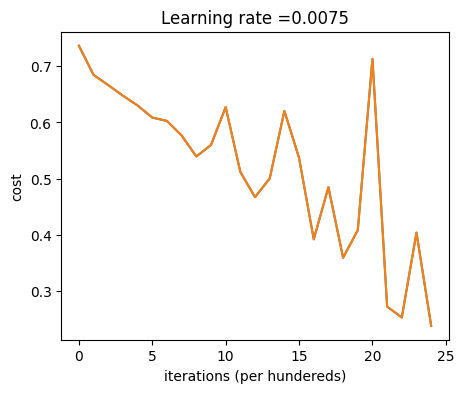

On the training set:
Accuracy: 0.7972251867662754
On the test set:
Accuracy: 0.584664536741214


In [21]:
parameters, costs = L_layer_model(train_x, train_y, layer_dims, learning_rate = 0.0075, num_iterations = 2500, print_cost = True, initialisation = "he")
plot_costs(costs, learning_rate=0.0075)
print ("On the training set:")
pred_train = predict(train_x, train_y, parameters)
print ("On the test set:")
pred_test = predict(test_x, test_y, parameters)

### <span style='color: red;'>Discuss the model results for these parameter iniatilisations.</span> ###

**Comment ** on the model peformance using these initalisation methods. Is the DNN still underperforming and why?


The model’s performance across different initialization methods shows noticeable improvements. Random initialization results in poor performance, with both training and test accuracies significantly lower, highlighting the inefficiency of random weight settings in deep networks. Xavier initialization, designed for sigmoid or tanh activations, improves training accuracy but still suffers from underfitting on the test set. He initialization, optimized for ReLU activations, offers the best test accuracy, though overfitting is still apparent. This underperformance could be due to factors like insufficient data or the model’s complexity (Goodfellow et al., 2016). Further techniques like regularization or a larger dataset may be required to mitigate overfitting.

Let us now look at two techniques to reduce overfitting.

<a name='4'></a>
## 4 - L-layer Neural Network with L2 regularization

<a name='4-1'></a>
## 4.1 - Regularized Model

You will use the following neural network (already implemented for you below). This model can be used in *regularization mode* by:
- setting the `lambd` input to a non-zero value. We use "`lambd`" instead of "`lambda`" because "`lambda`" is a reserved keyword in Python. 

You will implement:
- *L2 regularization* -- functions: "`compute_cost_with_regularization()`" and "`backward_propagation_with_regularization()`"

In each part, you will run this model with the correct inputs so that it calls the functions you've implemented. Take a look at the code below to familiarise yourself with the model.

In [22]:
# L_layer_model with L2 regularization - model()

def L_layer_model_reg(X, Y, layer_dims, learning_rate = 0.0075, num_iterations = 2500, print_cost=True, initialisation = "xavier", lambd = 0):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if dog), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimisation loop
    print_cost -- if True, it prints the cost every 100 steps
    initialisation -- flag to choose which initialisation to use ("random","xavier" or "he")
    lambd -- regularization hyperparameter, scalar
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    m = X.shape[1]                     # number of training examples

    # Initialise parameters dictionary.
    if initialisation == "random":
        parameters = initialise_parameters_random(layer_dims)
    elif initialisation == "xavier":
        parameters = initialise_parameters_xavier(layer_dims)
    elif initialisation == "he":
        parameters = initialise_parameters_he(layer_dims)
           
    # Loop (gradient descent)
    for i in range(0, num_iterations):    
            
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)  
    
        # Compute cost.
        if lambd == 0:
            cost = compute_cost(AL, Y)
        else:
            cost = compute_cost_with_regularization(AL, Y, parameters, lambd)
            
        # Backward propagation.
        if lambd == 0:
            grads = L_model_backward(AL, Y, caches)
        else:
            grads = L_model_backward_with_regularization(AL, Y, caches, lambd)

            
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                  
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
   
    return parameters, costs

def plot_costs(costs, learning_rate = 0.0075):
    # plot the cost
    #plt.plot(np.squeeze(costs))
    plt.plot(costs)   
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundereds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    

<a name='5-2'></a>
## 5.2 - L2 Regularization

The standard way to avoid overfitting is called **L2 regularization**. It consists of appropriately modifying your cost function, from:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

Let's modify your cost and observe the consequences.

<a name='ex-4'></a>
### Exercise 2.1 - compute_cost_with_regularization
Implement `compute_cost_with_regularization()` which computes the cost given by equation (2). To calculate $\sum\limits_k\sum\limits_j W_{k,j}^{[l]2}$  , use :
```python
np.sum(np.square(Wl))
```
Note that you have to do this for $W^{[1]}$, $W^{[2]}$,..., $W^{[L]}$, then sum the terms and multiply by $ \frac{1}{m} \frac{\lambda}{2} $.

In [23]:
# GRADED FUNCTION: compute_cost_with_regularization

def compute_cost_with_regularization(AL, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.
    
    Arguments:
    AL -- post-activation, output of forward propagation, of shape (output size, number of examples)
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)

    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    L = len(parameters) // 2 # number of layers in the neural network
    cross_entropy_cost = compute_cost(AL, Y) # This gives you the cross-entropy part of the cost
       
    # ENTER CODE HERE (2~4 lines of code)    
    L2_regularization_cost = (lambd / (2 * m)) * sum(
        np.sum(np.square(parameters["W" + str(l)])) for l in range(1, L + 1)
    )
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

In [24]:
# Test compute_cost_with_regularization
# Simulated predictions and labels
AL_test = np.array([[0.8, 0.3, 0.9, 0.4]])  # Example AL values
Y_test = np.array([[1, 0, 1, 0]])  # Corresponding true labels

# Example parameters dictionary with small random values
parameters_test = {
    "W1": np.random.randn(3, 4) * 0.01,
    "b1": np.zeros((3, 1)),
    "W2": np.random.randn(1, 3) * 0.01,
    "b2": np.zeros((1, 1))
}

# Regularization factor
lambda_test = 0.7

# Compute the cost with regularization
cost_test = compute_cost_with_regularization(AL_test, Y_test, parameters_test, lambda_test)

# Print the result
print("Regularized cost:", cost_test)

Regularized cost: 0.2991852481207957


Of course, because you changed the cost, you have to change backward propagation as well! All the gradients have to be computed with respect to this new cost. 

<a name='ex-5'></a>
### Exercise 2.2 - linear_backward_with_regularization
Implement the changes needed in backward propagation to take into account regularization. This function is called by the L_model_backward_with_regularization() function in the main model. The changes only concern dW1, dW2, ..., dWL. For each, you have to add the regularization term's gradient ($\frac{d}{dW} ( \frac{1}{2}\frac{\lambda}{m}  W^2) = \frac{\lambda}{m} W$).

In [25]:
# GRADED FUNCTION: linear_backward_propagation_with_regularization

def linear_backward_with_regularization(dZ, cache, lambd):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    # ENTER CODE HERE (~ 1 line of code)    
    dW = (1./m) * np.dot(dZ, A_prev.T) + (lambd/m) * W
    
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [26]:
# Simulated input data
A_prev = np.random.randn(5, 4)  # Previous activations (5 neurons, 4 examples)
W = np.random.randn(3, 5)       # Weights (3 neurons, 5 input features)
b = np.random.randn(3, 1)       # Biases (3 neurons, 1 bias per neuron)
dZ = np.random.randn(3, 4)      # Gradient of cost w.r.t. linear output
lambd = 0.7                     # Regularization parameter

# Cache tuple
cache = (A_prev, W, b)

# Call function
dA_prev, dW, db = linear_backward_with_regularization(dZ, cache, lambd)

# Print results
print("dA_prev:\n", dA_prev)
print("dW:\n", dW)
print("db:\n", db)

dA_prev:
 [[-2.7091946  -1.48706549  2.84010539  1.00361784]
 [-0.6721611  -0.16043892  0.79601296  2.48519332]
 [-0.11579605  0.00573294 -0.01067075  1.1390133 ]
 [-3.66967577 -1.78152724  3.85313163  4.06383981]
 [ 2.33024925  1.0189821  -2.27584091 -4.26314593]]
dW:
 [[-0.37153057  0.29093159 -0.35187326  0.09677721 -0.59826362]
 [ 0.14770988 -0.91591307  1.37566219 -0.26066155  1.89952545]
 [-0.17083535  0.31393816 -0.6748255  -0.01166015 -0.41465784]]
db:
 [[ 0.41071364]
 [-0.34590175]
 [ 0.34297752]]


Cost after iteration 0: 0.7642350681273273
Cost after iteration 100: 0.7124852996754848
Cost after iteration 200: 0.6941576796791363
Cost after iteration 300: 0.6754060389951555
Cost after iteration 400: 0.6589803409713051
Cost after iteration 500: 0.6521921967621066
Cost after iteration 600: 0.621250553573996
Cost after iteration 700: 0.6229731817135092
Cost after iteration 800: 0.6050308476561319
Cost after iteration 900: 0.5443351585164271
Cost after iteration 1000: 0.5271262730047495
Cost after iteration 1100: 0.5292105405612351
Cost after iteration 1200: 0.4962462906114313
Cost after iteration 1300: 0.5158565511235966
Cost after iteration 1400: 0.47445134283739676
Cost after iteration 1500: 0.569726130753202
Cost after iteration 1600: 0.5173956356460372
Cost after iteration 1700: 0.43877534874367086
Cost after iteration 1800: 0.5020587541297589
Cost after iteration 1900: 0.44409313124598127
Cost after iteration 2000: 0.34912034289829885
Cost after iteration 2100: 0.452822636690037

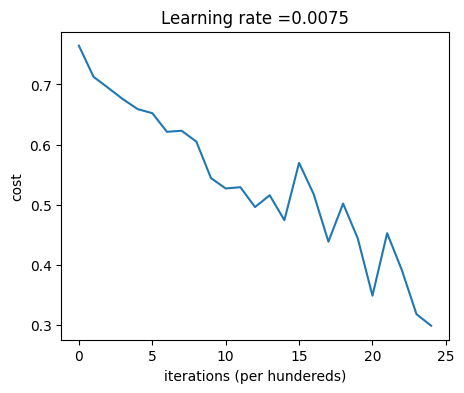

On the training set:
Accuracy: 0.9541088580576307
On the testset:
Accuracy: 0.5782747603833867


In [27]:
layer_dims = [12288, 20, 7, 5, 1] 
parameters, costs = L_layer_model_reg(train_x, train_y, layer_dims, initialisation = "he", lambd=0.8)

plot_costs(costs, learning_rate=0.0075)
print ("On the training set:")
pred_train = predict(train_x, train_y, parameters)
print ("On the testset:")
pred_test = predict(test_x, test_y, parameters)

**Observations**:
- The value of $\lambda$ is a hyperparameter that you can tune using a dev set.
- L2 regularization makes your decision boundary smoother. If $\lambda$ is too large, it is also possible to "oversmooth", resulting in a model with high bias.

**What is L2-regularization actually doing?**:

L2-regularization relies on the assumption that a model with small weights is simpler than a model with large weights. Thus, by penalising the square values of the weights in the cost function you drive all the weights to smaller values. It becomes too costly for the cost to have large weights! This leads to a smoother model in which the output changes more slowly as the input changes. 

<br>
<font color='blue'>
    
**What you should remember:** the implications of L2-regularization on:
- The cost computation:
    - A regularization term is added to the cost.
- The backpropagation function:
    - There are extra terms in the gradients with respect to weight matrices.
- Weights end up smaller ("weight decay"): 
    - Weights are pushed to smaller values.

<a name='5'></a>
## 5 - L Layer Neural Network with Dropout

Finally, **dropout** is a widely used regularization technique that is specific to deep learning. 
**It randomly shuts down some neurons in each iteration.** Watch these two videos to see what this means!

<!--
To understand drop-out, consider this conversation with a friend:
- Friend: "Why do you need all these neurons to train your network and classify images?". 
- You: "Because each neuron contains a weight and can learn specific features/details/shape of an image. The more neurons I have, the more featurse my model learns!"
- Friend: "I see, but are you sure that your neurons are learning different features and not all the same features?"
- You: "Good point... Neurons in the same layer actually don't talk to each other. It should be definitly possible that they learn the same image features/shapes/forms/details... which would be redundant. There should be a solution."
!--> 


<center>
<video width="620" height="440" src="images/dropout1_kiank.mp4" type="video/mp4" controls>
</video>
</center>
<br>
<caption><center><font color='purple'><b>Figure 2 </b>: <b>Drop-out on the second hidden layer.</b> <br> At each iteration, you shut down (= set to zero) each neuron of a layer with probability $1 - keep\_prob$ or keep it with probability $keep\_prob$ (50% here). The dropped neurons don't contribute to the training in both the forward and backward propagations of the iteration. </font></center></caption>

<center>
<video width="620" height="440" src="images/dropout2_kiank.mp4" type="video/mp4" controls>
</video>
</center>

<caption><center><font color='purple'><b>Figure 3</b>:<b> Drop-out on the first and third hidden layers. </b><br> $1^{st}$ layer: we shut down on average 40% of the neurons.  $3^{rd}$ layer: we shut down on average 20% of the neurons. </font></center></caption>


When you shut some neurons down, you actually modify your model. The idea behind drop-out is that at each iteration, you train a different model that uses only a subset of your neurons. With dropout, your neurons thus become less sensitive to the activation of one other specific neuron, because that other neuron might be shut down at any time. 


<a name='5-1'></a>
## 5.1 - Dropout Model

You will use the following neural network (already implemented for you below). This model can be used in *dropout mode* by:
- setting the `keep_prob` list input to a value less than one for any layer

You will implement:
- *Dropout* -- functions: "`drop_out_matrices()`", "`L_model_forward_with_dropout()`" and "`L_model_backward_with_dropout()`"

In each part, you will run this model with the correct inputs so that it calls the functions you've implemented. Take a look at the code below to familiarise yourself with the model.

In [28]:
# L_layer_model with drop-out

def L_layer_model_with_do(X, Y, layer_dims, keep_prob, learning_rate = 0.0075, num_iterations = 2500, print_cost=True, initialisation = "xavier"):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layer_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    keep_prob - list of probabilities of keeping a neuron active during drop-out for each layer
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimisation loop
    print_cost -- if True, it prints the cost every 100 steps
    initialisation -- flag to choose which initialisation to use ("random","xavier" or "he")
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(1)
    costs = []                         # keep track of cost
    m = X.shape[1]                     # number of training examples

    # Initialise parameters dictionary.
    if initialisation == "random":
        parameters = initialise_parameters_random(layer_dims)
    elif initialisation == "xavier":
        parameters = initialise_parameters_xavier(layer_dims)
    elif initialisation == "he":
        parameters = initialise_parameters_he(layer_dims)
           
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Initialise dropout matrices
        D = drop_out_matrices(layer_dims, m, keep_prob)        
            
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward_with_dropout(X, parameters, D, keep_prob)
            
        # Compute cost.
        cost = compute_cost(AL, Y)
            
        # Backward propagation.
        grads =  L_model_backward_with_dropout(AL, Y, caches, D, keep_prob)
            
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                  
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
   
    return parameters, costs


<a name='5-2'></a>
### 5.2 - Forward Propagation with Dropout

<a name='ex-6'></a>
### Exercise 3.1- drop_out_matrices and L_model_forward_with_dropout

Implement the forward propagation with dropout. You are using a L layer neural network, and will add dropout to all the layers using 2 function calls drop_out_matrices() and L_model_forward_with_dropout(). 

**Instructions**:
You would like to shut down some neurons in the hidden layers. To do that, you are going to carry out 4 Steps:
1. In the Q&A session, we dicussed creating a variable $d^{[1]}$ with the same shape as $a^{[1]}$ using `np.random.rand()` to randomly get numbers between 0 and 1. Here, you will use a vectorised implementation, so create a random matrix $D^{[1]} = [d^{[1](1)} d^{[1](2)} ... d^{[1](m)}] $ of the same dimension as $A^{[1]}$.You will create a $D^{[l]}$ matrix for each layer in the drop_out_matrices() function.
2. Set each entry of $D^{[1..L]}$ to be 1 with probability (`keep_prob`), and 0 otherwise.

**Hint:** Let's say that keep_prob = 0.8, which means that we want to keep about 80% of the neurons and drop out about 20% of them.  We want to generate a vector that has 1's and 0's, where about 80% of them are 1 and about 20% are 0.
This python statement:  
`X = (X < keep_prob).astype(int)`  

is conceptually the same as this if-else statement (for the simple case of a one-dimensional array) :

```
for i,v in enumerate(x):
    if v < keep_prob:
        x[i] = 1
    else: # v >= keep_prob
        x[i] = 0
```
Note that the `X = (X < keep_prob).astype(int)` works with multi-dimensional arrays, and the resulting output preserves the dimensions of the input array.

Also note that without using `.astype(int)`, the result is an array of booleans `True` and `False`, which Python automatically converts to 1 and 0 if we multiply it with numbers.  (However, it's better practice to convert data into the data type that we intend, so try using `.astype(int)`.)

3. In the L_model_forward_with_dropout() function, you will set $A^{[l]}$ to $A^{[l]} * D^{[l]}$ for each layer. (You are shutting down some neurons). You can think of $D^{[l]}$ as a mask, so that when it is multiplied with another matrix, it shuts down some of the values.
4. Divide $A^{[l]}$ by `keep_prob`. By doing this you are assuring that the result of the cost will still have the same expected value as without drop-out. (This technique is also called inverted dropout.)

*Note that for the input layer X, you will set  $A^{[0]}$ to $X * D^{[0]}$ and in the final layer you will set $A^{[L]}$ to $A^{[L]} * D^{[L]}$*

In [29]:
# GRADED FUNCTION: drop_out_matrices and L_model_forward_with_dropout

def drop_out_matrices(layer_dims, m, keep_prob):
    """
    Generate the dropout_matrices D[l,m]
    
    Arguments:
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    m -- number of training examples
    keep_prob - list of probabilities of keeping a neuron active during drop-out for each layer  

    Returns:
    D - list containing the Dropout values for each layer of size (layer_dims[l], m)
    """
    
    np.random.seed(1)
    L = len(layer_dims)
    D = {} # Returns D=D[0]D[1]D[2]D[3]D[4] for eg. with layer_dims =[12288, 20, 7, 5, 1]
          
    for l in range(L):      
        # ENTER CODE HERE (~ 2 lines of code)
        D[l] = np.random.rand(layer_dims[l], m)  # Initialise the random values for the dropout matrix
        D[l] = (D[l] < keep_prob[l]).astype(int)  # Convert it to 0/1 to shut down neurons corresponding to each element
   
        assert(D[l].shape == (layer_dims[l], m))
        
    return D


def L_model_forward_with_dropout(X, parameters, D, keep_prob):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialise_parameters_() python dictionary containing your parameters "W1","b1"..."WL","bL"
    keep_prob - list of probabilities of keeping a neuron active during drop-out for each layer  
    
    Returns:
    AL -- last post-activation value,  output of the forward propagation, of shape (1,1)
    caches -- tuple, information stored for computing the backward propagation
                list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []  
    L = len(parameters) // 2       # number of layers in the neural network
    A = X                          # input matrix A0
    
    # ENTER CODE HERE (~ 2 lines of code)
    A = A * D[0]  # shut down some units 
    A = A / keep_prob[0]  # scale that value of units to keep expected value the same


    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")

        # ENTER CODE HERE (~ 2 lines of code)
        A = A * D[l] # shut down some units A
        A = A / keep_prob[l] # scale that value of units to keep expected value the same  
        
        caches.append(cache)     
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")

    # ENTER CODE HERE (~ 2 lines of code)
    AL = AL * D[L] # shut down some units in last layer, Al=
    AL = AL / keep_prob[L] # scale that value of units to keep expected value the same  

    
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches


In [30]:
# Define test parameters
layer_dims = [5, 3, 2]  # Input layer with 5 neurons, hidden layer with 3, output layer with 2
m = 4                   # Number of training examples
keep_prob = [1.0, 0.8, 0.5]  # No dropout in input, 80% retention in hidden, 50% retention in output

# Call function
D = drop_out_matrices(layer_dims, m, keep_prob)

# Print results
for l in range(len(layer_dims)):
    print(f"D[{l}]:\n", D[l])

D[0]:
 [[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
D[1]:
 [[0 0 1 1]
 [0 0 1 1]
 [1 0 1 1]]
D[2]:
 [[0 0 0 1]
 [0 0 1 0]]


In [31]:
# Test L_model_forward_with_dropout

# Simulated data (X) - 5 features (input size) and 4 examples (number of examples)
X_test = np.array([[0.1, 0.2, 0.3, 0.4], 
                  [0.5, 0.6, 0.7, 0.8], 
                  [0.9, 1.0, 1.1, 1.2], 
                  [1.3, 1.4, 1.5, 1.6], 
                  [1.7, 1.8, 1.9, 2.0]])

# Example parameters dictionary for a 2-layer model (2 hidden layers)
parameters_test = {
    "W1": np.random.randn(3, 5) * 0.01,
    "b1": np.zeros((3, 1)),
    "W2": np.random.randn(1, 3) * 0.01,
    "b2": np.zeros((1, 1))
}

# Dropout matrices (D) for 3 layers (2 hidden + 1 output layer)
# Simulating dropout for each layer with keep_prob = 0.8
D_test = {
    0: np.random.rand(5, 4) < 0.8,  # Dropout for input layer (5 inputs, 4 examples)
    1: np.random.rand(3, 4) < 0.8,  # Dropout for hidden layer 1 (3 units, 4 examples)
    2: np.random.rand(1, 4) < 0.8   # Dropout for output layer (1 unit, 4 examples)
}

# Keep probability for each layer
keep_prob_test = [0.8, 0.8, 0.8]

# Call the function with test parameters
AL_test, caches_test = L_model_forward_with_dropout(X_test, parameters_test, D_test, keep_prob_test)

# Print the results
print("AL (output of forward propagation):")
print(AL_test)
print("\nCaches stored for backward propagation:")
print(caches_test)

AL (output of forward propagation):
[[0.62486768 0.625      0.         0.62485194]]

Caches stored for backward propagation:
[((array([[0.125, 0.25 , 0.375, 0.5  ],
       [0.625, 0.75 , 0.   , 1.   ],
       [0.   , 1.25 , 1.375, 0.   ],
       [1.625, 1.75 , 0.   , 2.   ],
       [2.125, 2.25 , 0.   , 2.5  ]]), array([[ 0.00900856, -0.00683728, -0.0012289 , -0.00935769, -0.00267888],
       [ 0.00530355, -0.00691661, -0.00396754, -0.00687173, -0.00845206],
       [-0.00671246, -0.00012665, -0.0111731 ,  0.00234416,  0.01659802]]), array([[0.],
       [0.],
       [0.]])), array([[-0.0240461 , -0.02681539,  0.00168847, -0.02774559],
       [-0.03278711, -0.03986364, -0.00346653, -0.03913843],
       [ 0.03816184,  0.02570834, -0.01788019,  0.04270049]])), ((array([[0.        , 0.        , 0.00211059, 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.0477023 , 0.        , 0.        , 0.05337561]]), array([[ 0.00742044, -0.00191836, -0.00887629]]), array([[

<a name='5-3'></a>
### 5.3 - Backward Propagation with Dropout

<a name='ex-7'></a>
### Exercise 3.2 - L_model_backward_with_dropout
Implement the backward propagation with dropout. As before, you are training a L layer network. Add dropout to the layers, using the masks $D^{[1]}$ ... $D^{[L]}$ generated from drop_out_matrices(). 

**Instruction**:
Backpropagation with dropout is actually quite easy. You will have to carry out 2 Steps:
1. You had previously shut down some neurons during forward propagation, by applying a mask $D^{[1]}$ to `A1`. In backpropagation, you will have to shut down the same neurons, by reapplying the same mask $D^{[1]}$ to `dA1`. 
2. During forward propagation, you had divided `A1` by `keep_prob`. In backpropagation, you'll therefore have to divide `dA1` by `keep_prob` again (the calculus interpretation is that if $A^{[1]}$ is scaled by `keep_prob`, then its derivative $dA^{[1]}$ is also scaled by the same `keep_prob`).
3. Repeat steps 1 and 2 for all the layers in the network starting with the output layer computing $dA^{[L]}$ .


In [37]:
# GRADED FUNCTION: L_model_backward_with_dropout

def L_model_backward_with_dropout(AL, Y, caches, D, keep_prob):
    """
    Implements the backward propagation of our baseline model to which we add dropout capbility.
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    caches -- cache output from forward_propagation()
    keep_prob - list of probabilities of keeping a neuron active during drop-out for each layer

    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
      
    # Initialising the backpropagation, dA for output layer
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # ENTER CODE HERE (~ 2 lines of code)
    dAL *= D[L]
    dAL /= keep_prob[L]
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, activation = "sigmoid") 

    # ENTER CODE HERE (~ 2 lines of code)
    grads["dA" + str(L - 1)] = dA_prev_temp * D[L - 1] # shut down dA(L-1)
    grads["dA" + str(L - 1)] /= keep_prob[L - 1] # scale the value of units dA(L-1)  

    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp
    
    
    for l in range(L-1, 0, -1):  # do l=L-1, .., l=1
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l-1]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l)], current_cache, activation = "relu")

        # ENTER CODE HERE (~ 2 lines of code) 
        grads["dA" + str(l - 1)] = dA_prev_temp * D[l - 1] # shut down dA(l-1)
        grads["dA" + str(l - 1)] /= keep_prob[l - 1] # scale the value of units dA(l-1)=
        
        grads["dW" + str(l)] = dW_temp
        grads["db" + str(l)] = db_temp        
        
    return grads


Let's now run the model with dropout (`keep_prob = 0.86`). We can set a keep_prob value for each layer, however we will not use dropout for the input and final 2 layers (including the output layer). It means at every iteration you shut down each neurons of layer 1 and 2 with 14% probability. The function `model()` will now call:
- `L_model_forward_with_dropout` instead of `L_model_forward`.
- `L_model_backward_with_dropout` instead of `L_model_backward`.

Cost after iteration 0: 0.7403354156161437
Cost after iteration 100: 0.6779771972495108
Cost after iteration 200: 0.645281783201728
Cost after iteration 300: 0.6187110759364497
Cost after iteration 400: 0.5844097171103338
Cost after iteration 500: 0.6111317807707005
Cost after iteration 600: 0.6063035460686775
Cost after iteration 700: 0.6165104400206061
Cost after iteration 800: 0.5063122551859199
Cost after iteration 900: 0.556148995738548
Cost after iteration 1000: 0.4986979160992208
Cost after iteration 1100: 0.4249718444377477
Cost after iteration 1200: 0.4320866392861074
Cost after iteration 1300: 0.4319213506621641
Cost after iteration 1400: 0.4794772204541267
Cost after iteration 1500: 0.38074108837424736
Cost after iteration 1600: 0.5911939241196223
Cost after iteration 1700: 0.5570142203520877
Cost after iteration 1800: 0.4342090115121108
Cost after iteration 1900: 0.37433778431819226
Cost after iteration 2000: 0.2784475337638777
Cost after iteration 2100: 0.24318339675169007

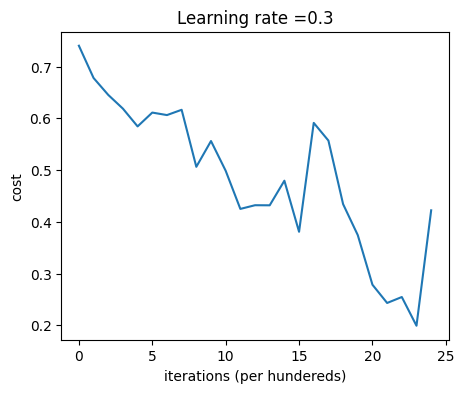

On the train set:
Accuracy: 0.6531483457844183
On the test set:
Accuracy: 0.4984025559105431


In [38]:
# Setup keep probabilities list for layers
keep_prob = [1, 0.86, 0.86, 1, 1]
layer_dims = [12288, 20, 7, 5, 1] #  4-layer model (input-layer, 3 hidden-layers + 1 output=layer)
parameters, costs = L_layer_model_with_do(train_x, train_y, layer_dims, keep_prob=keep_prob, learning_rate=0.03, num_iterations=2500, initialisation = "he")

plot_costs(costs, learning_rate=0.3)
print ("On the train set:")
pred_train = predict(train_x, train_y, parameters)
print ("On the test set:")
pred_test = predict(test_x, test_y, parameters)

### <span style='color: red;'>Discuss the model results using Dropout.</span> ###

**Comment** on the model peformance using Dropout. Is the DNN performing differently and what observations can you make?

The model’s performance with dropout (keep_prob = 0.86) shows reduced overfitting, as indicated by a closer train-test accuracy gap (65.3% vs. 49.8%). However, the overall test accuracy remains low, suggesting that while dropout improves generalization, other factors such as hyperparameter tuning or dataset quality may limit performance. As noted in Deep Learning (Goodfellow et al., 2016), dropout prevents co-adaptation of neurons but should be combined with proper weight initialization and sufficient training epochs for optimal results.

<a name='6'></a>
##  6 - Results Analysis

First, take a look at some images the L-layer model labeled incorrectly. This will show a few mislabeled images. 

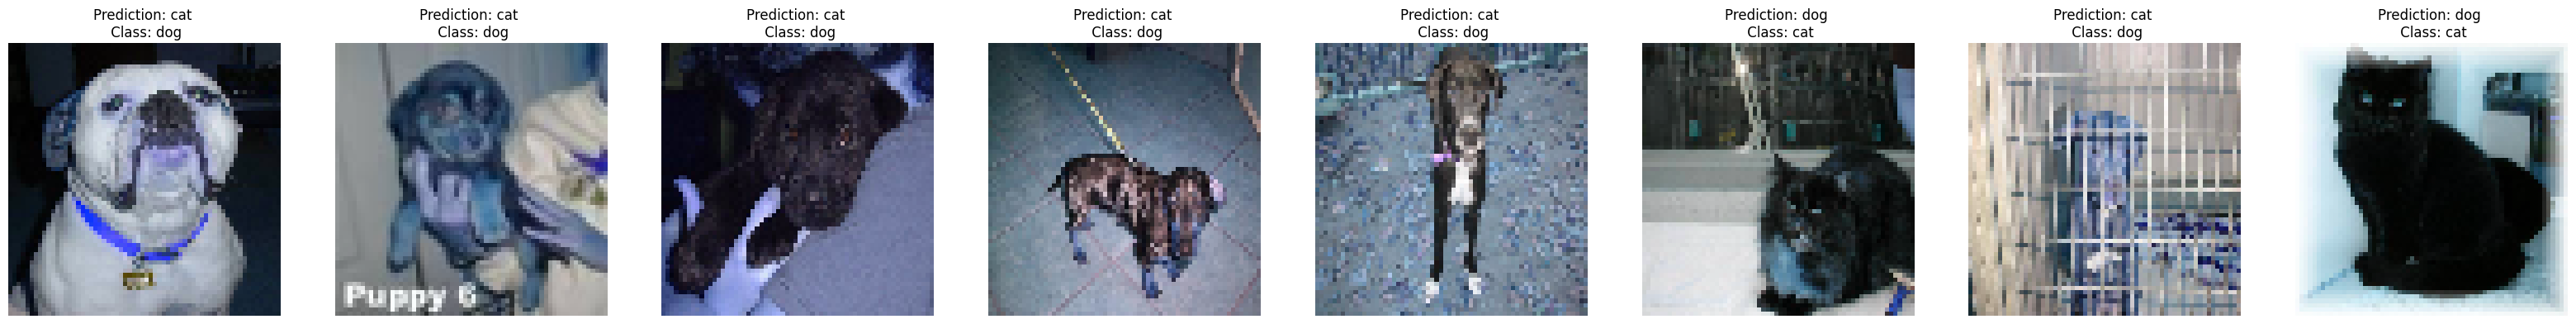

In [49]:
print_mislabeled_images(classes, test_x, test_y, pred_test)
plt.show()

**A few types of images the model tends to do poorly on include:** 
- Animal body in an unusual position
- Animal appears against a background of a similar color
- Unusual animal color and species
- Camera angle
- Brightness of the picture
- Scale variation (dog/cat is very large or small in image) 

### Congratulations on finishing this assignment! 

You just built and trained a deep L-layer neural network, and applied it in order to distinguish dogs from cats,a good introduction to deep learning. ;) 

Amazing work! If you'd like to test out further - there's an optional ungraded exercise below, where you can test your own image. 

<a name='7'></a>
## 7 - Test with your own image (optional/ungraded exercise) ##

From this point, if you so choose, you can use your own image to test  the output of your model. To do that follow these steps:

1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your home directory.
2. Add your image to this Jupyter Notebook's directory, in the "images" folder
3. Change your image's name in the following code
4. Run the code and check if the algorithm is right (0 = cat, 1 = dog)!

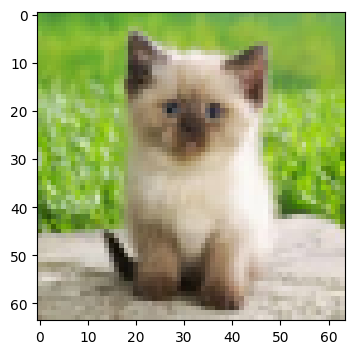

Accuracy: 1.0
y = 0.0, your L-layer model predicts a "cat" picture.


In [53]:
## MODIFY THIS CODE HERE ##
my_image = "cat.jpg" # change this to the name of your image file 
my_label_y = [0] # the true class of your image (0 -> cat, 1 -> dog )
## MODIFICATION ENDS HERE ##

plt.rcParams['figure.figsize'] = (5, 4) # set default size of plots
fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
plt.show()
         
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

my_predicted_image = predict(image, my_label_y, parameters)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image))] +  "\" picture.")

**References**:

- Xavier Initialisation: https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf
- He Initialisation: https://arxiv.org/abs/1502.01852